## AdventureWorks Försäljningsanalys

I den här analysen kommer vi att göra en undersökning av Adventureworks 2025-databasen syftar till att identifiera mönster i försäljning, kundbeteende, säsongsbetonad försäljningsprestanda och regional prestanda. Först och främst kommer vi att analysera data för att besvara följande affärsfrågor. Genom att göra detta kan vi komma fram till att ge några rekommendationer till förbättra försäljningsprestation och ökad operativ effektivitet.

**Affärsfrågorna:**

- Hur många produkter finns i varje kategori?
- Vilka produktkategorier genererar mest intäkter?
- Hur har försäljningen utvecklats över tid?
- Hur ser total försäljning och antal ordrar ut per år?
- Vilka 10 produkter genererar mest försäljning?
- Hur skiljer sig försäljningen mellan olika regioner, och hur många unika kunder har varje region?
- Vilka regioner har högst/lägst genomsnittligt ordervärde, och skiljer det sig mellan individuella kunder och företagskunder?

  ##### Och

ALTERNATIV A: Regional försäljningsoptimering vilken har följande analysfrågor:

-	Vilken region presterar bäst/sämst?
-	Vilka produktkategorier säljer bäst var?
-	Finns säsongsmönster per region?
-	Rekommendationer för förbättring?

#### Analysen genomfördes genom en kombination av SQL, Python, Pandas, Matplotlib och Seaboen. Vi använder SQL för att hämta data och Python för att analysera data.

In [20]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

# Databaskonfiguration
server = 'localhost'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL server")


connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    f"?driver={driver}&trusted_connection=yes&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)



### 1: Antal produkter per kategori

**Affärsfråga:**
- Hur många produkter finns i varje kategori?

**Visualisering**
- Vertikalt stapeldiagram (bar)

**Metod**
- Tabellerna Production.ProductCategory, Production.ProductSubcategory och Production.Product kopplades samman via primär- och främmande nycklar för att säkerställa korrekt hierarkisk relation mellan kategorier, underkategorier och produkter. 
- Antalet produkter per kategori beräknades genom att räkna unika produkt-ID
- Resultatet från SQL-frågan importerades därefter till Python med hjälp av Pandas för vidare analys och visualisering. Ett stapeldiagram skapades med Matplotlib för att ge en visuell översikt av produktfördelningen per kategori. 
- Slutligen identifierades den kategori med högst respektive lägst antal produkter genom att använda Pandas funktioner för att hitta max- och min-värden i datamängden.

c:\adventureworks-analysis\.venv\Lib\site-packages\pandas\io\sql.py:1648: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


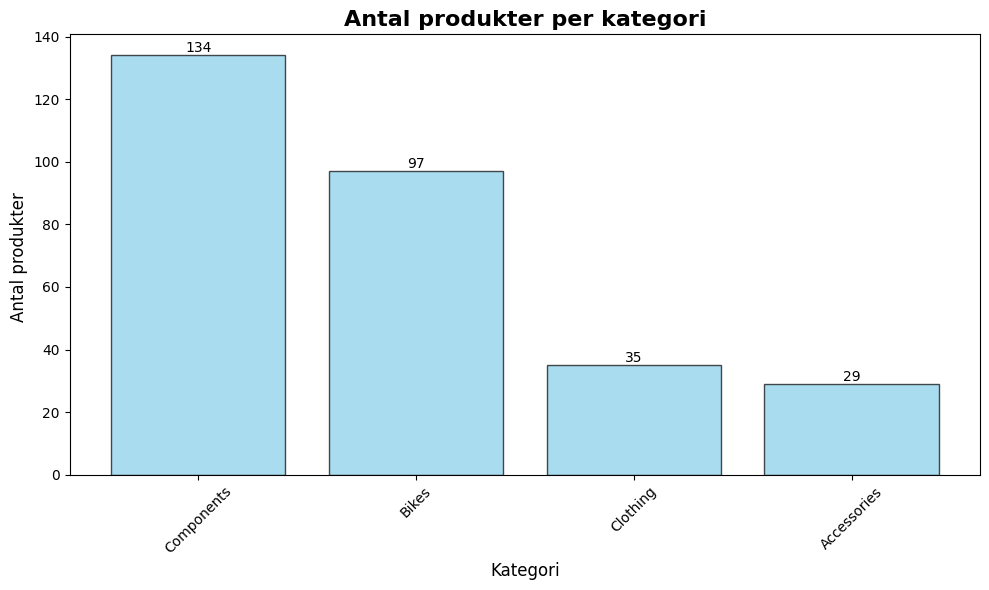

Flest produkter: Components (134)
Minst produkter: Accessories (29)


In [21]:
query = """
SELECT 
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS NumberOfProducts
FROM Production.ProductCategory pc
JOIN Production.ProductSubcategory psc
    ON pc.ProductCategoryID = psc.ProductCategoryID
JOIN Production.Product p
    ON psc.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY NumberOfProducts DESC;
"""

df = pd.read_sql(query, engine)
df
plt.figure(figsize=(10,6))
bars= plt.bar(df['CategoryName'], df['NumberOfProducts'], color='skyblue', edgecolor='black', alpha= 0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.title("Antal produkter per kategori", fontsize=16, fontweight= "bold")
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Antal produkter ", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


max_row = df.loc[df['NumberOfProducts'].idxmax()]
min_row = df.loc[df['NumberOfProducts'].idxmin()]
print(f'Flest produkter: {max_row['CategoryName']} ({int(max_row['NumberOfProducts'])})')
print(f'Minst produkter: {min_row['CategoryName']} ({int(min_row['NumberOfProducts'])})')



### Insikter
##### Lista över totalt antal produkter per kategori

- Components  134
- Bikes       97
- Clothing    35
- Accessories 29

- **Flest produkter: Components (134)**
- **Minst produkter: Accessories (29)**.



### 2: Försäljning per produktkategori

**Affärsfråga:**  
- Vilka produktkategorier genererar mest intäkter?

**Visualisering:**  
- Horisontellt stapeldiagram (barh)  
-  Sortera staplar från högst till lägst (högsta överst)

**Metod**
- Tabellerna Production.ProductCategory, Production.ProductSubcategory, Production.Product, Sales.SalesOrderDetail kopplades samman via primär- och främmande nycklar 
- SQL query grupperade data efter produktkategori och beräknade den totala försäljningen per kategori med hjälp av funktionen SUM().
- Med matplotlib visualiseras data som försäljning per kategori. 

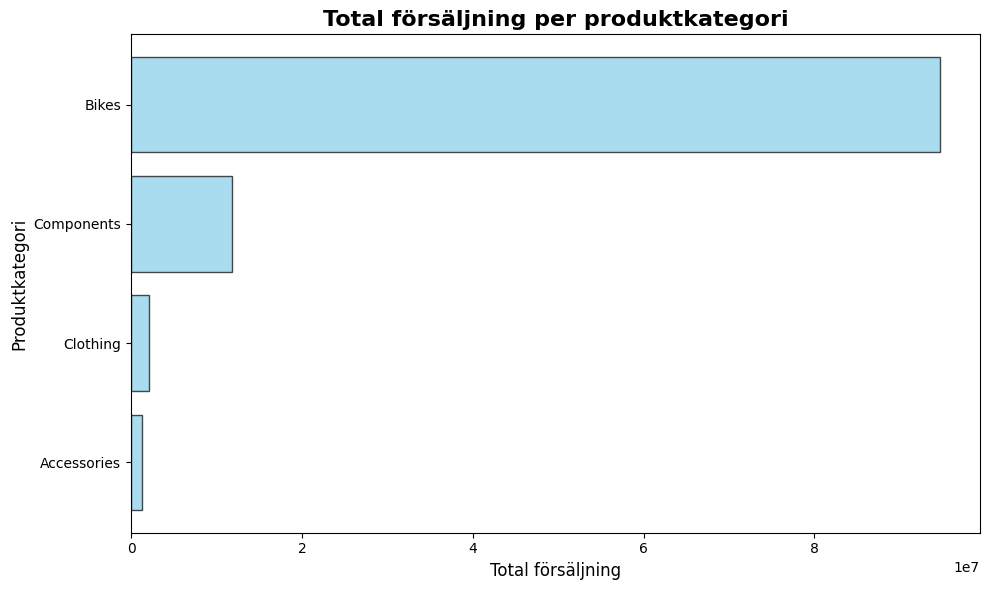

In [22]:
query = """
SELECT
    pc.Name AS CategoryName,
    SUM(sod.LineTotal) AS TotalSales
FROM Production.ProductCategory pc
JOIN Production.ProductSubcategory psc
    ON pc.ProductCategoryID = psc.ProductCategoryID
JOIN Production.Product p
    ON psc.ProductSubcategoryID = p.ProductSubcategoryID
JOIN Sales.SalesOrderDetail sod
    ON p.ProductID = sod.ProductID
GROUP BY pc.Name
ORDER BY TotalSales DESC;
"""

df_sales = pd.read_sql(query, engine)
df_sales

plt.figure(figsize=(10,6))
plt.barh(df_sales['CategoryName'], df_sales['TotalSales'], color='skyblue', edgecolor='black', alpha= 0.7)
plt.title("Total försäljning per produktkategori", fontsize=16, fontweight= "bold")
plt.xlabel("Total försäljning", fontsize=12)
plt.ylabel("Produktkategori", fontsize=12)
plt.gca().invert_yaxis()  # högsta överst
plt.tight_layout()
plt.show()


### Insikter

- Produktkategorin **Bikes** genererar mest intäkter
  med en total försäljning på **94651172.70**.
- Produktkategorin **Accessories** genererar minst intäkter
  med en total försäljning på **1272072.88**.

Detta visar vilka produktområden som är lönsamma och kan användas för strategiska beslut.
##### Härifrån ser vi att bikes Katagori  har inte flest produkter men har den högsta försäljningen.


### 3: Försäljningstrend över tid

**Affärsfråga:** 

- Hur har försäljningen utvecklats över tid?

**Visualisering:**
  
- Tydlig tidslinje på X-axeln 

**Metod**
- Försäljningsdata hämtades från databasen med hjälp av en SQL query mot tabellen SalesOrderHeader.
- Den totala försäljningen per månad beräknades genom att summera kolumnen TotalDue.Resultatet grupperades per månad och sorterades i kronologisk ordning för att möjliggöra trendanalys. 
- SQL-resultatet importerades till Python med hjälp av pandas och lagrades i en DataFrame.
- En linjegraf skapades med Matplotlib för att visualisera hur försäljningen har utvecklats över tid.

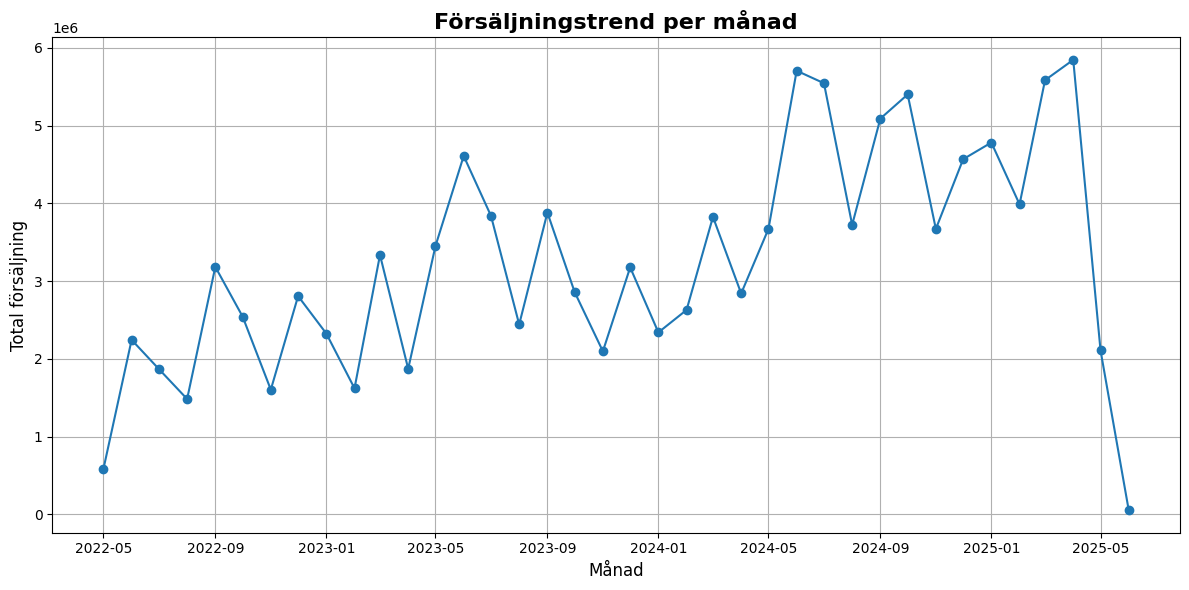

Högsta månad: 2025-04-01 (5847164.69)
Lägsta månad: 2025-06-01 (52478.19)


In [23]:
query = """
SELECT
    FORMAT(OrderDate, 'yyyy-MM') AS OrderMonth,
    SUM(TotalDue) AS MonthlySales
FROM Sales.SalesOrderHeader
GROUP BY FORMAT(OrderDate, 'yyyy-MM')
HAVING COUNT(*) > 0
ORDER BY OrderMonth;
"""

df_trend = pd.read_sql(query, engine)
df_trend

df_trend['OrderMonth'] = pd.to_datetime(df_trend['OrderMonth'])
df_trend['MonthlySales'] = df_trend['MonthlySales'].round(2)


plt.figure(figsize=(12,6))
plt.plot(df_trend['OrderMonth'], df_trend['MonthlySales'], marker='o')
plt.title("Försäljningstrend per månad", fontsize=16, fontweight="bold")
plt.xlabel("Månad", fontsize=12)
plt.ylabel("Total försäljning", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


max_row = df_trend.loc[df_trend['MonthlySales'].idxmax()]
min_row = df_trend.loc[df_trend['MonthlySales'].idxmin()]
print(f'Högsta månad: {max_row['OrderMonth'].date()} ({max_row['MonthlySales']:})')
print(f'Lägsta månad: {min_row['OrderMonth'].date()} ({min_row['MonthlySales']:})')

### Insikter

- Försäljningstrenden visar en **ökande och minskande** utveckling över tid.
- Den högsta försäljningen inträffade under **2025 april** med en total försäljning på
  **5847164.69**.
- Den lägsta försäljningen inträffade under **2025 juni** med en total försäljning på
  **52478.19**.

Försäljningstrenden visar en **övergripande ökande** utveckling över tid. Trenden indikerar också **möjliga säsongsvariationer, upp- och nedgångar**, där vissa månader konsekvent visar högre försäljning.

**Varje år utan 2025 ökar försäljningen från maj till juni, men år 2025 sker en kraftig minskning av försäljningen från april till juni vilket är mycket märkbart.**


### 4: Försäljning och antal ordrar per år

**Affärsfråga:**  

- Hur ser total försäljning och antal ordrar ut per år?

**Visualisering:**  
- Stapeldiagram av total försäljning per år
- Stapeldiagram av antal ordrar per år

**Metod**
- Försäljningsdata hämtades från databasen med hjälp av en SQL query mot tabellen SalesOrderHeader.
- Orderdatumet (OrderDate) aggregerades till årsvis nivå med hjälp av funktionen YEAR() och Den totala försäljningen per år beräknades genom att summera kolumnen TotalDue. Antalet ordrar per år beräknades genom att räkna antalet SalesOrderID. Resultatet grupperades per år och sorterades i stigande kronologisk ordning.
- SQL-resultatet importerades till Python med hjälp av pandas och lagrades i en DataFrame.
- Ett stapeldiagram skapades med Matplotlib för att visa total försäljning per år.
- Det år med högst och lägst total försäljning, flest och minst antal ordrar identifierades genom max- och minvärdesanalys.

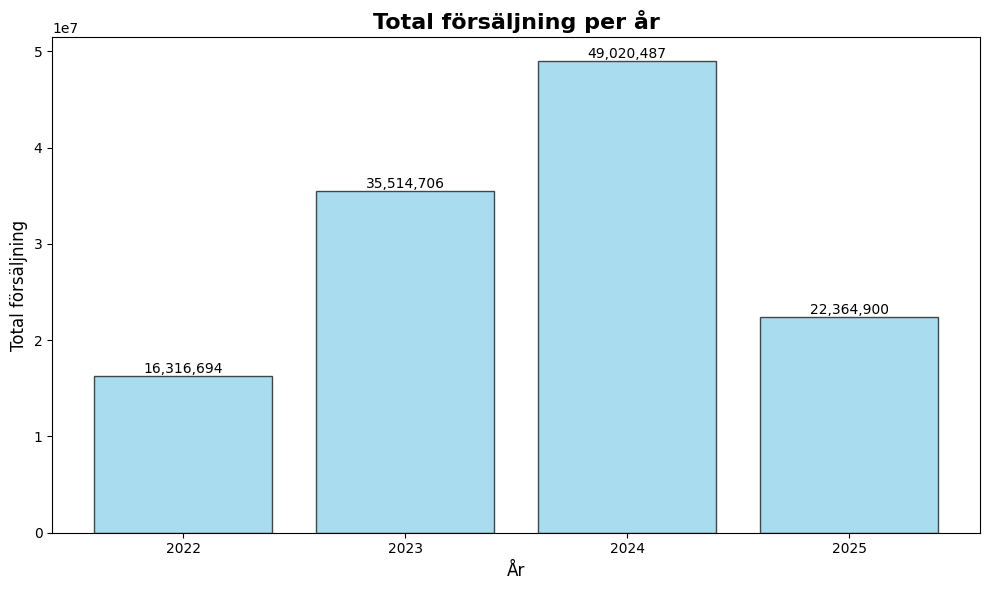

Störst försäljning år: 2024 (49020486.51)
Minst försäljning år: 2022 (16316694.17)


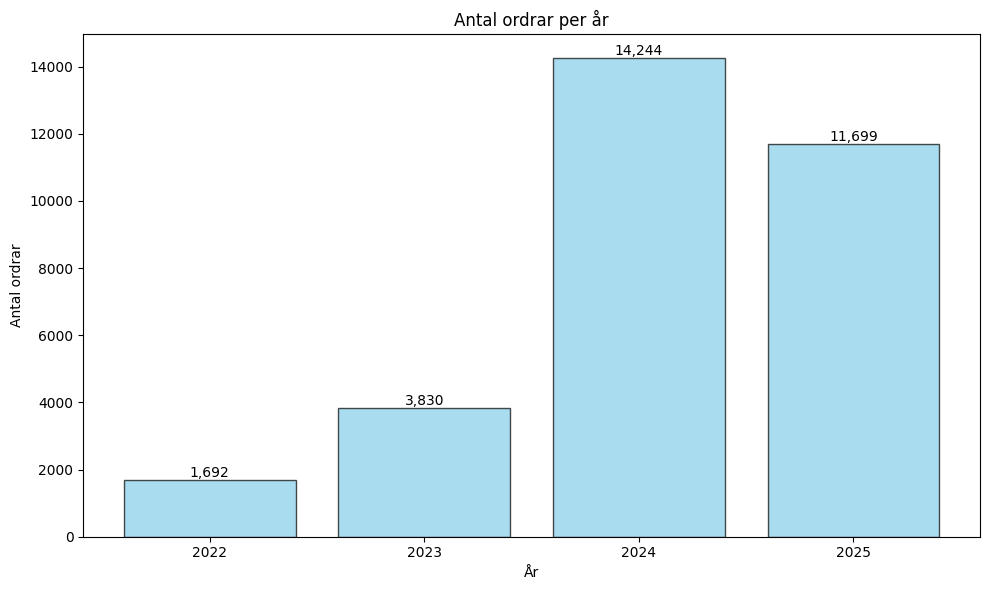

Mest ordrar år: 2024 (14244)
Minst ordrar år: 2022 (1692)


In [24]:
query = """
SELECT
    YEAR(OrderDate) AS OrderYear,
    SUM(TotalDue) AS TotalSales,
    COUNT(SalesOrderID) AS OrderCount
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;
"""

df_year = pd.read_sql(query, engine)

df_year['TotalSales'] = df_year['TotalSales'].round(2)


df_year['OrderYear'] = df_year['OrderYear'].astype(int)

plt.figure(figsize=(10,6))
bars=plt.bar(df_year['OrderYear'], df_year['TotalSales'], color='skyblue', edgecolor='black', alpha= 0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)


plt.title("Total försäljning per år", fontsize=16, fontweight="bold")
plt.xlabel("År", fontsize=12)
plt.ylabel("Total försäljning", fontsize=12)
plt.xticks(df_year['OrderYear'])  # <-- FIX
plt.tight_layout()
plt.show()

max_row = df_year.loc[df_year['TotalSales'].idxmax()]
min_row = df_year.loc[df_year['TotalSales'].idxmin()]

print(f'Störst försäljning år: {int(max_row['OrderYear'])} ({max_row['TotalSales']:})')
print(f'Minst försäljning år: {int(min_row['OrderYear'])} ({min_row['TotalSales']:})')

plt.figure(figsize=(10,6))
bars=plt.bar(df_year['OrderYear'], df_year['OrderCount'], color='skyblue', edgecolor='black', alpha= 0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)
plt.title("Antal ordrar per år")
plt.xlabel("År")
plt.ylabel("Antal ordrar")
plt.xticks(df_year['OrderYear'])  # <-- FIX
plt.tight_layout()
plt.show()

max_row = df_year.loc[df_year['OrderCount'].idxmax()]
min_row = df_year.loc[df_year['OrderCount'].idxmin()]

print(f'Mest ordrar år: {int(max_row['OrderYear'])} ({int(max_row['OrderCount'])})')
print(f'Minst ordrar år: {int(min_row['OrderYear'])} ({int(min_row['OrderCount'])})')



### Insikter

- Året med högst total försäljning är **2024**, med en försäljning på **49020486.51**.  
- Året med flest total försäljning är **2022**, med en försäljning på **16316694.17**.

- Året med högst ordrar är **2024**, med totalt **14244** ordrar.
- Året med flest ordrar är **2022**, med totalt **1692** ordrar.
- Analysen visar att **både försäljning och antal ordrar ökar** över tid och vi har inte hela årets data för 2025 och därför det ser mindre än 2024.
- I 2024 ökar antalet ordrar snabbare än försäljningen, vilket kan indikera ett mindre genomsnittligt ordervärde.


### 5: Top 10 produkter efter försäljning

**Affärsfråga:**  
Vilka 10 produkter genererar mest försäljning?

**Visualisering:**  
- Horisontellt stapeldiagram  
- Sorterat från högst till lägst försäljning  


**Metod**
- Tabellerna Production.Product och Sales.SalesOrderDetail kopplades samman.
- De 10 produkter med högst total försäljning valdes med hjälp av TOP 10.
- SQL-resultatet importerades till Python med hjälp av pandas och lagrades i en DataFrame.
- Ett horisontellt stapeldiagram skapades med Matplotlib för att visualisera försäljningen per produkt.


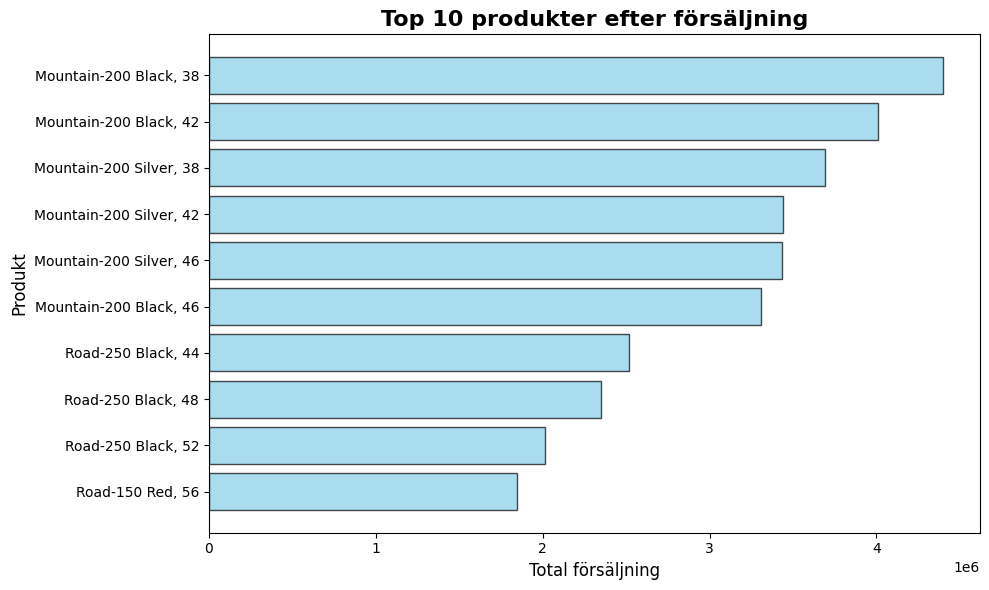

In [25]:
query = """
SELECT TOP 10
    p.Name AS ProductName,
    Round(SUM(sod.LineTotal), 2) AS TotalSales
FROM Sales.SalesOrderDetail sod
JOIN Production.Product p
    ON sod.ProductID = p.ProductID
GROUP BY p.Name
ORDER BY TotalSales DESC;
"""

df_top10 = pd.read_sql(query, engine)
df_top10 = df_top10.sort_values('TotalSales')
df_top10


plt.figure(figsize=(10,6))
plt.barh(df_top10['ProductName'], df_top10['TotalSales'], color='skyblue', edgecolor='black', alpha= 0.7)
plt.title("Top 10 produkter efter försäljning", fontsize=16, fontweight="bold")
plt.xlabel("Total försäljning", fontsize=12)
plt.ylabel("Produkt", fontsize=12)
plt.tight_layout()
plt.show()


### Insikter

- Den produkt som genererar mest försäljning är **Mountain-200 Black, 38**  med en total försäljning på **4400592.8**.

- Analysen av topp 10 produkter visar att **Mountain-200** dominerar listan  med flest produkter bland de tio mest säljande.

- På topp 10-listan är alla produkter bikes, vilket innebär att bikes är den viktigaste kategorin.


### 6: Försäljning och antal kunder per region 

**Affärsfråga:**

- Hur skiljer sig försäljningen mellan olika regioner, och hur många unika kunder har varje region?

**Visualisering:** 
- En stapel för försäljning, en stapel för antal kunder
- Sortera regioner från högst försäljning

**Metod**
- Tabellerna  Sales.SalesTerritory, Sales.SalesOrderHeader, Sales.Customer kopplades.
- Den totala försäljningen per region beräknades genom att summera kolumnen TotalDue.
- Antalet unika kunder per region beräknades genom att räkna distinkta CustomerID.
- SQL-resultatet importerades till Python med hjälp av pandas och lagrades i en DataFrame.
- Ett kombinerat stapeldiagram skapades med Matplotlib för att visualisera två mått samtidigt:Total försäljning per region och Antal unika kunder per region.


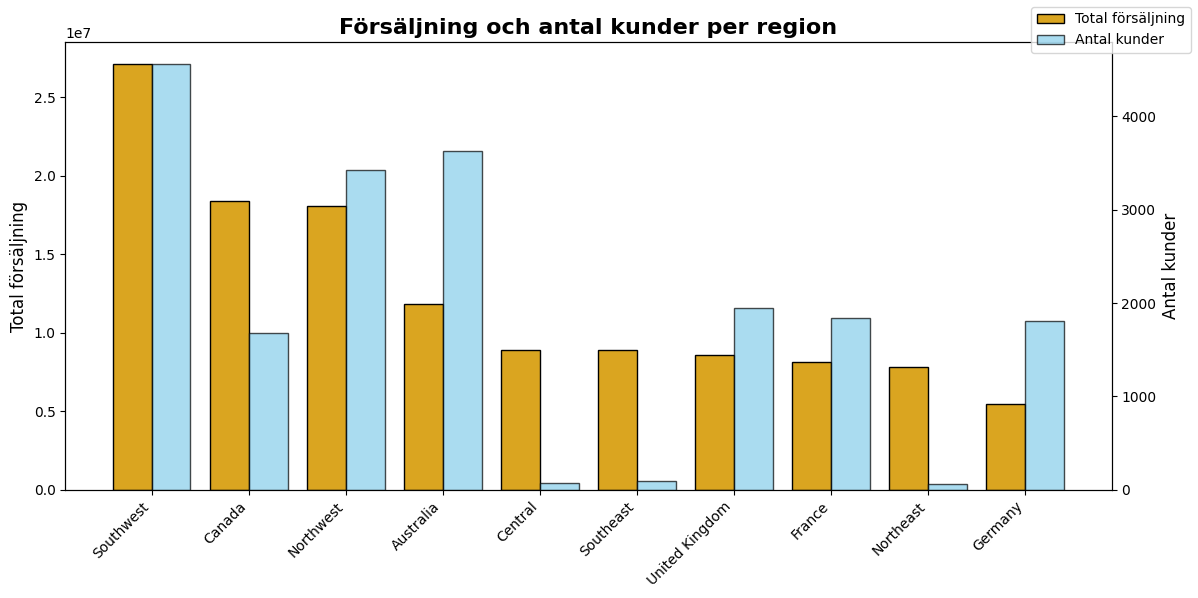

,Region,TotalSales,UniqueCustomers,SalesPerCustomer
0,Southwest,27150594.59,4565,5947.56
1,Canada,18398929.19,1677,10971.34
2,Northwest,18061660.37,3428,5268.86
3,Australia,11814376.10,3625,3259.14
4,Central,8913299.25,69,129178.25
5,Southeast,8884099.37,91,97627.47
6,United Kingdom,8574048.71,1951,4394.69
7,France,8119749.35,1844,4403.33
8,Northeast,7820209.63,57,137196.66
9,Germany,5479819.58,1812,3024.18


In [26]:
query = """
SELECT
    st.Name AS Region,
    ROUND(SUM(soh.TotalDue), 2) AS TotalSales,
    COUNT(DISTINCT c.CustomerID) AS UniqueCustomers
FROM Sales.SalesOrderHeader soh
JOIN Sales.SalesTerritory st
    ON soh.TerritoryID = st.TerritoryID
JOIN Sales.Customer c
    ON soh.CustomerID = c.CustomerID
GROUP BY st.Name
ORDER BY TotalSales DESC;
"""


df_region = pd.read_sql(query, engine)
df_region


x = np.arange(len(df_region))
width = 0.4

fig, ax1 = plt.subplots(figsize=(12,6))

# Stapel 1 – Försäljning
ax1.bar(x - width/2, df_region['TotalSales'], width, color='goldenrod', edgecolor='black', label='Total försäljning')
ax1.set_ylabel('Total försäljning', fontsize=12)

# Stapel 2 – Antal kunder (andra axeln)
ax2 = ax1.twinx()
ax2.bar(x + width/2, df_region['UniqueCustomers'], width, color='skyblue', edgecolor='black', alpha= 0.7, label='Antal kunder')
ax2.set_ylabel('Antal kunder', fontsize=12)

# X-axel
ax1.set_xticks(x)
ax1.set_xticklabels(df_region['Region'], rotation=45, ha='right')

# Titel
plt.title("Försäljning och antal kunder per region", fontsize=16, fontweight="bold")

# Legend (kombinerad)
fig.legend(loc="upper right")

plt.tight_layout()
plt.show()


top_sales_region = df_region.loc[df_region['TotalSales'].idxmax()]
top_sales_region

df_region['SalesPerCustomer'] = (
    df_region['TotalSales'] / df_region['UniqueCustomers']
).round(2)

df_region['SalesPerCustomer'] = df_region['SalesPerCustomer'].round(2)
df_region






### Insikter

- Regionen med högst total försäljning är **Southwest** med **27150594.59** i försäljning.

- Den svagaste regionen är **Germany** med **5479819.58** i försäljning.

- Trots att Southwest har högst försäljning har den inte bra försäljning per kund, vilket tyder på att regionen har fler kunder med lägre ordervärden.

- Noreast har minst kund(57) med högst försäljning per kund **137196.66**


### 7: Genomsnittligt ordervärde per region och kundtyp

**Affärsfråga:**

- Vilka regioner har högst/lägst genomsnittligt ordervärde, och skiljer det sig mellan individuella kunder och företagskunder?

**visualisering:**

- Två staplar per region: en för Store, en för Individual

- Sortera regioner från högst genomsnitt (totalt)

**Metod**
- Sales.SalesTerritory, Sales.SalesOrderHeader, Sales.Customer, Sales.Store tabellerna har använts.
- Genomsnittligt ordervärde (total försäljning / antal order) per region har  beräknats.
- Genomsnittligt ordervärde grupperades efter region och kundtyp (Store och Individual) och ritades upp i ett stapeldiagram.


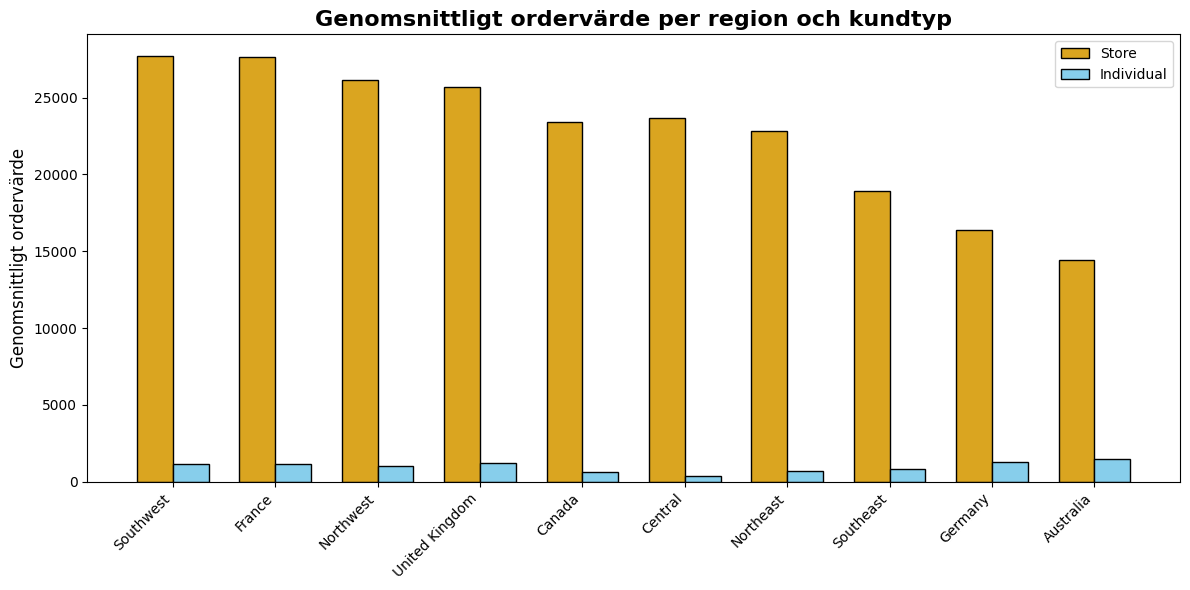

In [27]:
query = """
WITH CustomerOrders AS (
    SELECT
        st.Name AS Region,
        CASE 
            WHEN c.StoreID IS NOT NULL THEN 'Store'
            ELSE 'Individual'
        END AS CustomerType,
        COUNT(*) AS OrderCount,
        SUM(soh.TotalDue) AS TotalSales
    FROM Sales.SalesOrderHeader AS soh
    INNER JOIN Sales.SalesTerritory AS st 
        ON soh.TerritoryID = st.TerritoryID
    INNER JOIN Sales.Customer AS c 
        ON soh.CustomerID = c.CustomerID
    LEFT JOIN Sales.Store AS s 
        ON c.StoreID = s.BusinessEntityID
    GROUP BY
        st.Name,
        CASE 
            WHEN c.StoreID IS NOT NULL THEN 'Store'
            ELSE 'Individual'
        END
)
SELECT
    Region,
    CustomerType,
    ROUND(CAST(TotalSales AS DECIMAL(18,2)) / NULLIF(OrderCount, 0), 2) AS AvgOrderValue,
    TotalSales,
    OrderCount
FROM CustomerOrders
ORDER BY Region, CustomerType;

"""

df_avg = pd.read_sql(query, engine)
df_avg


region_order = df_avg.groupby('Region')['AvgOrderValue'].sum().sort_values(ascending=False).index
df_avg['Region'] = pd.Categorical(df_avg['Region'], categories=region_order, ordered=True)
df_avg = df_avg.sort_values(['Region', 'CustomerType'])

# Pivotera data så vi får Store och Individual som kolumner

df_pivot = df_avg.pivot(index='Region', columns='CustomerType', values='AvgOrderValue').fillna(0)

# Säkerställ att båda kolumnerna finns
for col in ['Store', 'Individual']:
    if col not in df_pivot.columns:
        df_pivot[col] = 0

# Rita grupperat stapeldiagram

regions = df_pivot.index
x = np.arange(len(regions))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

# Store staplar (burn yellow)
ax.bar(x - width/2, df_pivot['Store'], width, label='Store', color="goldenrod", edgecolor='black', linewidth=1)

# Individual staplar (skyblue)
ax.bar(x + width/2, df_pivot['Individual'], width, label='Individual', color='skyblue', edgecolor='black', linewidth=1)

ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')


ax.set_ylabel("Genomsnittligt ordervärde", fontsize=12)

plt.title("Genomsnittligt ordervärde per region och kundtyp", fontsize=16, fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()





### Insikter
 
- Store har ett betydligt högre ordervärde än individual i alla regioner.
- **Southwest** har högsta genomsnittligt ordervärde(Store) och **Australia** har lägsta genomsnittligt ordervärde(Store).


### DJUPANALYS: Alternativ-A(Regional försäljningsoptimering)

**Affärsfrågor:**

- Vilken region presterar bäst/sämst?
- Vilka produktkategorier säljer bäst var?
- Finns säsongsmönster per region?
- Rekommendationer för förbättring?

**visualisering:**

- Fyra staplar(Produktkategori-försäljning) per region 

- säsongsmönster per region

**Metod**
- Försäljningsdata hämtades från databasen med hjälp av en SQL query.
- Tabeller som har använts är Sales.SalesOrderDetail, Sales.SalesOrderHeader, Sales.SalesTerritory, Production.Product, Production.ProductSubcategory, Production.ProductCategory.
- Produktkategoriförsäljning per region har visualiserats med stapeldiagram.
- Säsongsbetonade försäljningsmönster per region har också visats med matplotlib.


### Vilka produktkategorier säljer bäst var?

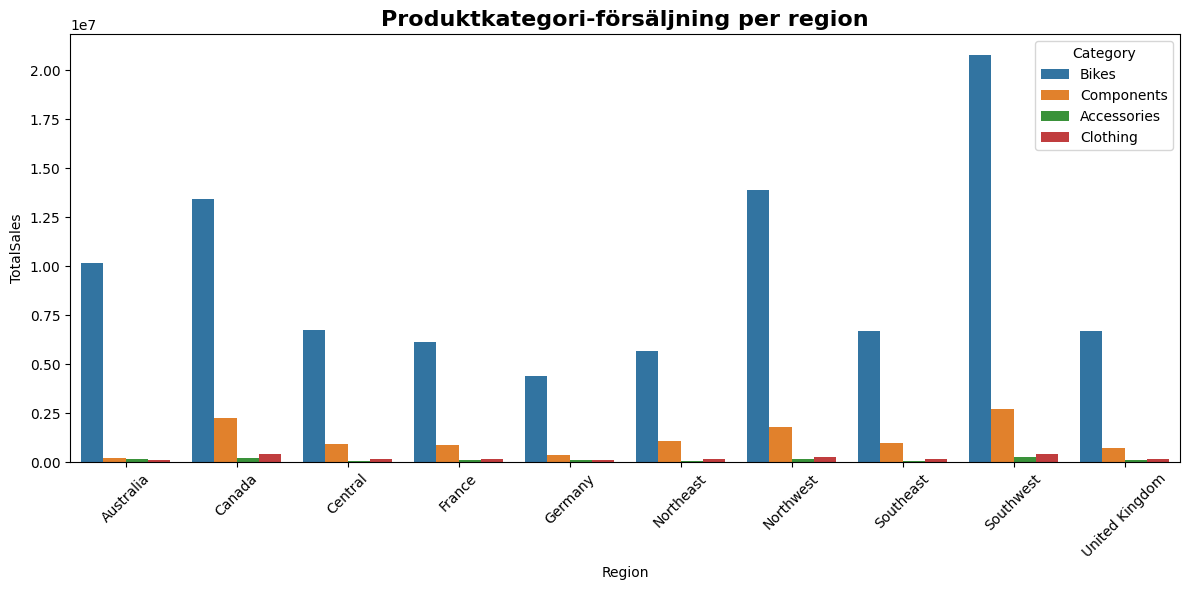

In [28]:
query = """
SELECT
    st.Name AS Region,
    pc.Name AS Category,
    ROUND(SUM(sod.LineTotal), 2) AS TotalSales
FROM Sales.SalesOrderDetail sod
JOIN Sales.SalesOrderHeader soh
    ON sod.SalesOrderID = soh.SalesOrderID
JOIN Sales.SalesTerritory st
    ON soh.TerritoryID = st.TerritoryID
JOIN Production.Product p
    ON sod.ProductID = p.ProductID
JOIN Production.ProductSubcategory psc
    ON p.ProductSubcategoryID = psc.ProductSubcategoryID
JOIN Production.ProductCategory pc
    ON psc.ProductCategoryID = pc.ProductCategoryID
GROUP BY st.Name, pc.Name
ORDER BY st.Name, TotalSales DESC;
"""

df_cat_region = pd.read_sql(query, engine)

# Best category per region
best_per_region = (
    df_cat_region
    .sort_values(['Region', 'TotalSales'], ascending=[True, False])
    .groupby('Region')
    .first()
    .reset_index()
)

best_per_region


import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_cat_region,
    x='Region',
    y='TotalSales',
    hue='Category'
)

plt.title("Produktkategori-försäljning per region", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Säsongsmönster per region

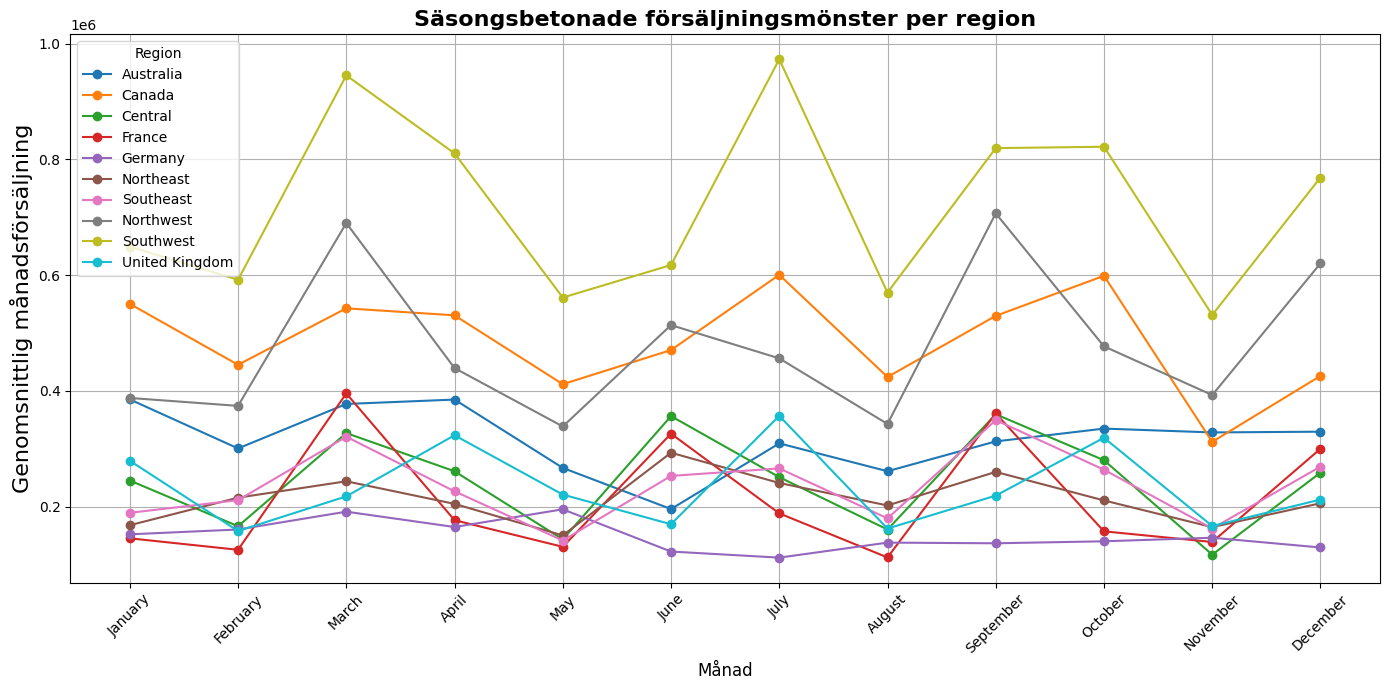

In [29]:
query = """

SELECT
    st.Name AS Region,
    YEAR(soh.OrderDate) AS Year,
    MONTH(soh.OrderDate) AS Month,
    DATENAME(MONTH, soh.OrderDate) AS MonthName,
    ROUND(SUM(soh.TotalDue), 2) AS TotalSales
FROM Sales.SalesOrderHeader soh
JOIN Sales.SalesTerritory st
    ON soh.TerritoryID = st.TerritoryID
GROUP BY
    st.Name,
    YEAR(soh.OrderDate),
    MONTH(soh.OrderDate),
    DATENAME(MONTH, soh.OrderDate)
ORDER BY
    st.Name, Year, Month;
"""

df_region_season = pd.read_sql(query, engine)
df_region_season.head()


df_region_season['Date'] = pd.to_datetime(
    df_region_season['Year'].astype(str) + '-' +
    df_region_season['Month'].astype(str) + '-01'
)

df_region_season = df_region_season.sort_values(['Region', 'Date'])

df_region_month_avg = (
    df_region_season
    .groupby(['Region', 'Month'])
    .agg(
        MonthName=('MonthName', 'first'),
        AvgMonthlySales=('TotalSales', 'mean')
    )
    .reset_index()
    .sort_values('Month')
)

df_region_month_avg.head()
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

for region in df_region_month_avg['Region'].unique():
    data = df_region_month_avg[df_region_month_avg['Region'] == region]
    plt.plot(
        data['Month'],
        data['AvgMonthlySales'],
        marker='o',
        label=region
    )

plt.title("Säsongsbetonade försäljningsmönster per region", fontsize=16, fontweight="bold")
plt.xlabel("Månad", fontsize=12)
plt.ylabel("Genomsnittlig månadsförsäljning", fontsize=16)
plt.xticks(range(1,13), df_region_month_avg.sort_values('Month')['MonthName'].unique(), rotation=45)
plt.legend(title="Region")
plt.grid(True)
plt.tight_layout()
plt.show()
import seaborn as sns  



### Insikter
- I alla regioner säljs Bikes mest och betydligt mer än i andra kategorier, följt av components.

- Den tidsbaserade analysen indikerar tydliga säsongsmönster, där vissa perioder uppvisar betydligt högre försäljningsnivåer än andra.



### Sammanfattning och Rekommendationer 


I analysen ovan har vi jämfört försäljningsdata med produktkategori, regionsvis och kundtypsvis. Topp 10-produkterna visar vilken kategori som dominerar.Vi har analyserat hur försäljningen har utvecklats över tid, vilken produktförsäljning är bäst eller sämst i någon region. tydliga säsongsmönster, där vissa perioder uppvisar betydligt högre försäljningsnivåer än andra.

Genom att använda en datadriven och differentierad strategibaserad på region, säsong, produktkategori och kundtyp kan företaget förbättra både försäljning, lönsamhet och operativ effektivitet. 

Efterfrågan på produktkategorier skiljer sig markant mellan regioner, vilket skapar möjligheter för optimering av sortiment och lagerhållning.

Företaget kan testa kampanjer i svagare regioner och under lågtrafik för att öka försäljningen.

Northeast regionen har minst antal kunder (57) med den högsta försäljningen per kund **137196,66**. Företaget behöver fokusera på att öka antalet kunder där.
